Chapter 31  
# Linkages in Hierarchical Clustering
*Machine Learning Made Easy and Visual with Python*

## Initialization

In [3]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.datasets import load_iris
from sklearn.cluster import AgglomerativeClustering
from matplotlib.colors import ListedColormap

## Load the Iris dataset

In [5]:
iris = load_iris()
X = iris.data[:, :2]  # use only the first two features (sepal length and width)

## Define clustering algorithms and their linkage methods

In [7]:
clustering_algorithms = (
    ('Single linkage', 'single'),
    ('Average linkage', 'average'),
    ('Complete linkage', 'complete'),
)

## Hierarchical clustering linkage

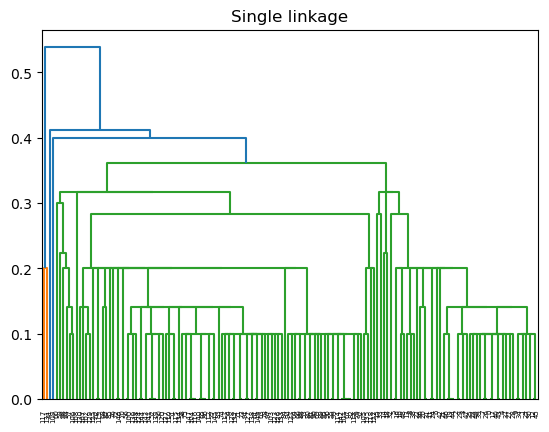

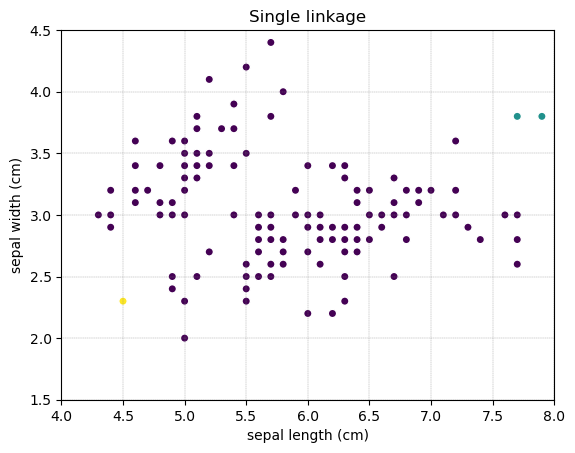

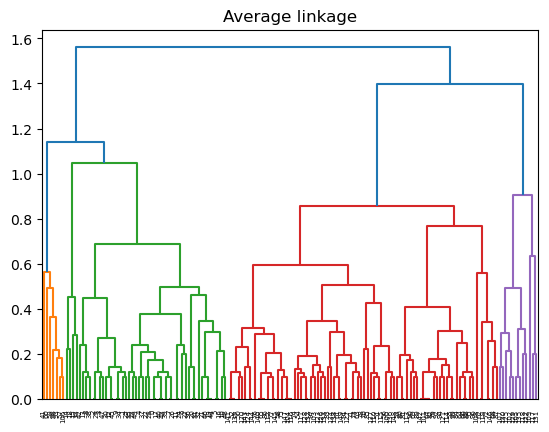

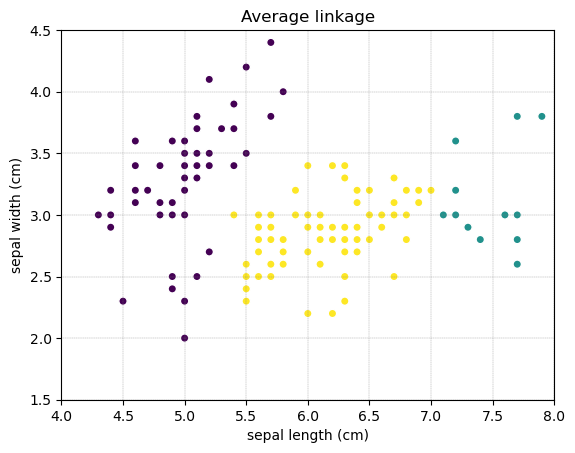

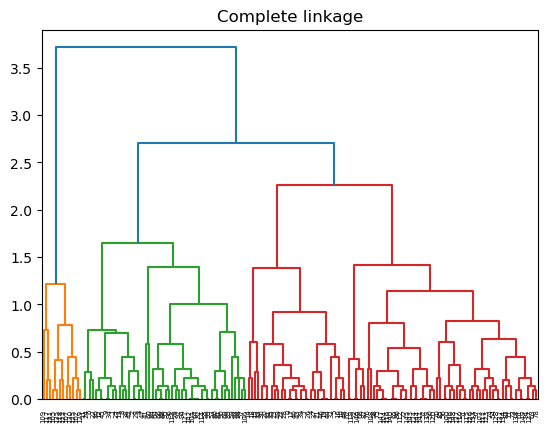

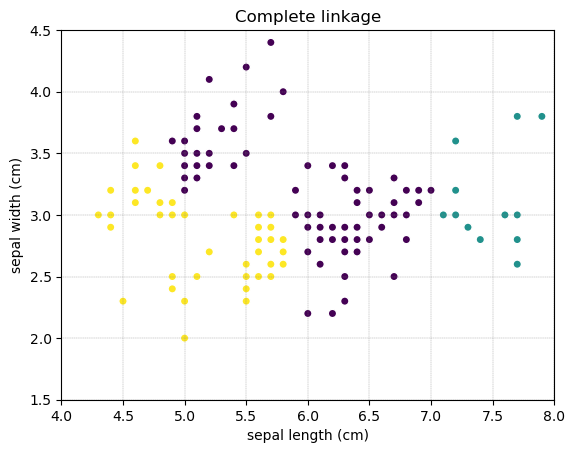

In [9]:

# Create custom color map for plotting clusters
rgb = [[255, 238, 255],  # light red
       [219, 238, 244],  # light blue
       [228, 228, 228]]  # light gray
rgb = np.array(rgb) / 255.  # normalize RGB values to [0, 1]

cmap_light = ListedColormap(rgb)  # create a ListedColormap object

for name, method in clustering_algorithms:

    # Plot the hierarchical dendrogram
    fig, ax = plt.subplots()
    plt.title(name)
    
    # Compute the hierarchical clustering linkage and plot dendrogram
    dend = dendrogram(linkage(X, method=method))
    
    # Perform agglomerative hierarchical clustering
    cluster = AgglomerativeClustering(
        n_clusters=3,       # number of clusters to form
        metric='euclidean', # distance metric
        linkage=method      # linkage method (single, average, complete)
    )
    
    # Fit the model and predict cluster labels
    Z = cluster.fit_predict(X)
    
    # Visualize clustering results in a scatter plot
    fig, ax = plt.subplots()
    plt.title(name)
    
    # Scatter plot of data points colored by cluster label
    plt.scatter(
        x=X[:, 0], 
        y=X[:, 1], 
        c=Z, 
        alpha=1.0, 
        linewidth=1, 
        edgecolor=[1, 1, 1]  # white edge for better visualization
    )
    
    # Set ticks, limits, labels, and grid for better readability
    ax.set_xticks(np.arange(4, 8.5, 0.5))
    ax.set_yticks(np.arange(1.5, 5, 0.5))
    ax.set_xlim(4, 8)
    ax.set_ylim(1.5, 4.5)
    plt.xlabel(iris.feature_names[0])  # 'sepal length (cm)'
    plt.ylabel(iris.feature_names[1])  # 'sepal width (cm)'
    
    ax.grid(linestyle='--', linewidth=0.25, color=[0.5, 0.5, 0.5])  # light dashed grid
    ax.set_aspect('equal')  # equal scaling on both axes